# Machine Learning Project Checklist

1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
5. Explore many different models and short-list the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.

## Frame the Problem and Look at the Big Picture

1. Define the objective in business terms.
2. How will your solution be used?
3. What are the current solutions/workarounds (if any)?
4. How should you frame this problem (supervised/unsupervised, online/offline, etc.)?
5. How should performance be measured?
6. Is the performance measure aligned with the business objective?
7. What would be the minimum performance needed to reach the business objective?
8. What are comparable problems? Can you reuse experience or tools?
9. Is human expertise available?
10. How would you solve the problem manually?
11. List the assumptions you (or others) have made so far.
12. Verify assumptions if possible.

## Get the Data
Note: automate as much as possible so you can easily get fresh data.

1. List the data you need and how much you need.
2. Find and document where you can get that data.
3. Check how much space it will take.
4. Check legal obligations, and get authorization if necessary.
5. Get access authorizations.
6. Create a workspace (with enough storage space).
7. Get the data.
8. Convert the data to a format you can easily manipulate (without changing the data itself).
9. Ensure sensitive information is deleted or protected (e.g., anonymized).
10. Check the size and type of data (time series, sample, geographical, etc.).
7. For supervised learning tasks, identify the target attribute(s).
11. Sample a test set, put it aside, and never look at it (no data snooping!).

In [1]:
import pandas as pd

players = pd.read_csv('DataFrame.csv')

In [2]:
players.head()

,Unnamed: 0,time,emg_right_hand,emg_left_hand,facial_skin_temperature,gsr,heart_rate,linaccel_x_back,linaccel_y_back,linaccel_z_back,...,Interest,Focus,gaze_movement,pupil_diameter,rot_x,rot_y,rot_z,buttons_pressed,mouse_movement,mouse_clicks
0,0,0.0,15.358974,6.615385,33.849000,14911.100077,102.000000,-0.01,-0.01,-0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,20.135531,8.713065,33.839667,15007.795630,101.333333,-0.01,-0.01,-0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2.0,19.110350,7.511174,33.829000,15253.731761,100.571429,-0.01,-0.01,-0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3.0,15.918163,6.971881,33.817267,15329.187062,99.200000,-0.01,-0.01,-0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4.0,13.031369,6.418652,33.804742,15045.053246,98.064516,-0.01,-0.01,-0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
players[["team","time"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149753 entries, 0 to 149752
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   team    149753 non-null  object 
 1   time    149753 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.3+ MB


In [4]:
players["team"].value_counts()

amateurs    81738
pros        68015
Name: team, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(players, test_size=.2, random_state=43)

In [6]:
train.shape

(119802, 112)

In [7]:
test.shape

(29951, 112)

## Explore the Data
Note: try to get insights from a field expert for these steps.

1. Create a copy of the data for exploration (sampling it down to a manageable size if necessary).
2. Create a Jupyter notebook to keep a record of your data exploration.
3. Study each attribute and its characteristics:
   1. Name
   2. Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
   3. % of missing values
   4. Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
   5. Possibly useful for the task?
   6. Type of distribution (Gaussian, uniform, logarithmic, etc.)   
4. Visualize the data.
5. Study the correlations between attributes.
6. Study how you would solve the problem manually.
7. Identify the promising transformations you may want to apply.
8. Identify extra data that would be useful (go back to “Get the Data”).
9. Document what you have learned.

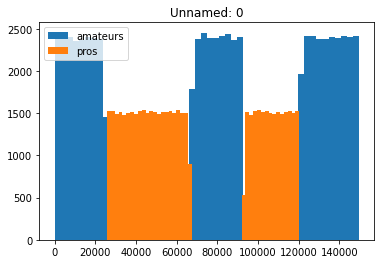

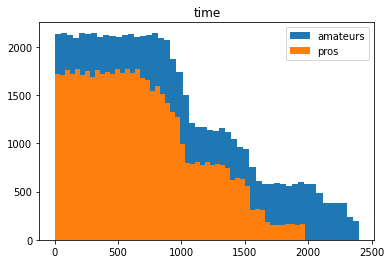

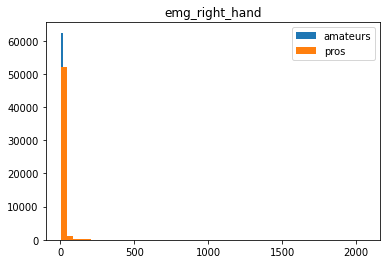

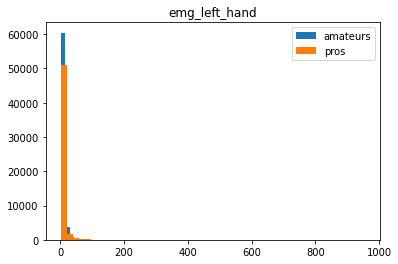

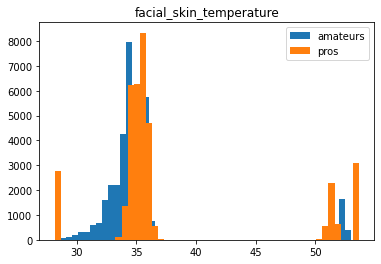

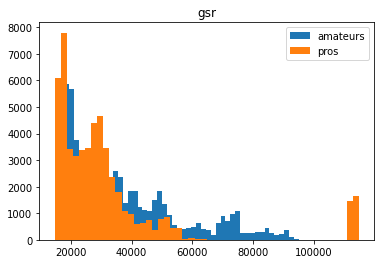

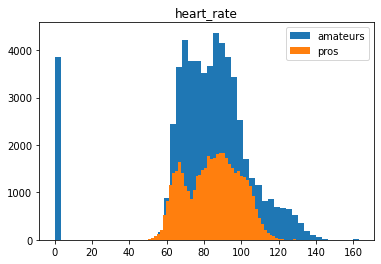

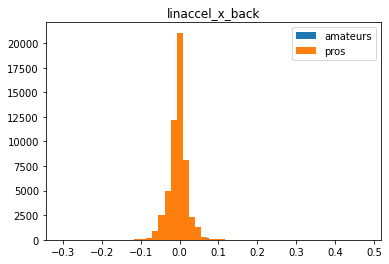

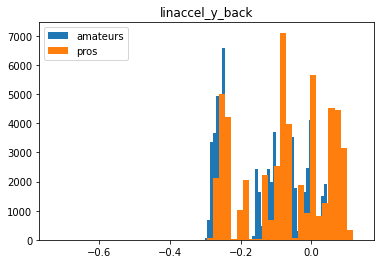

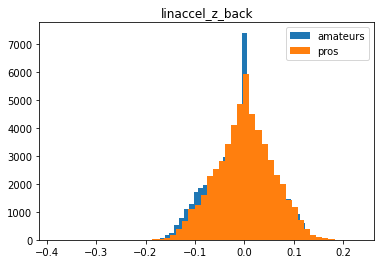

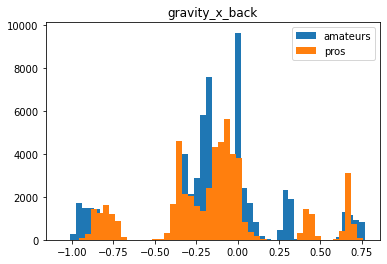

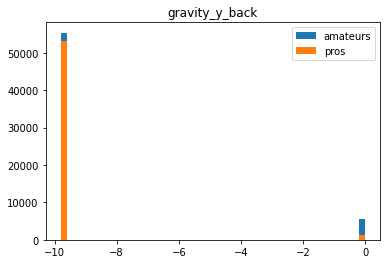

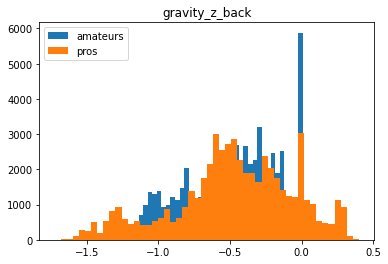

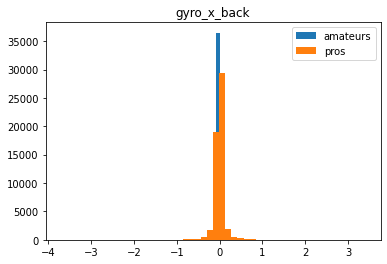

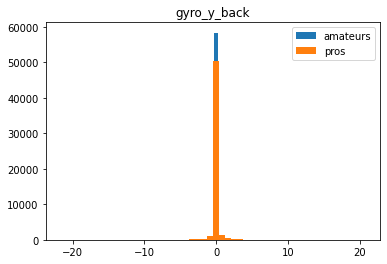

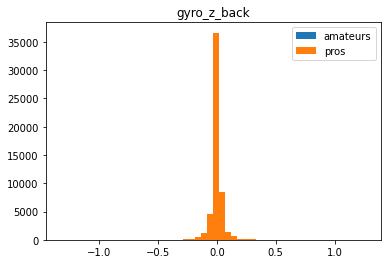

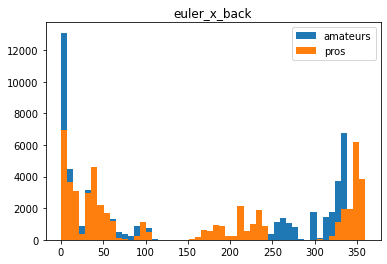

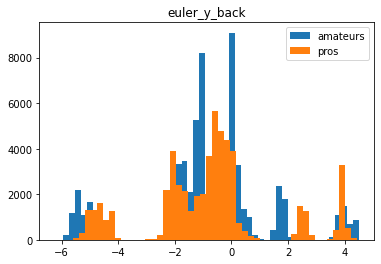

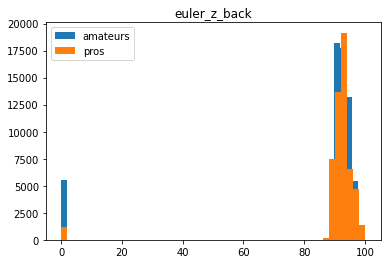

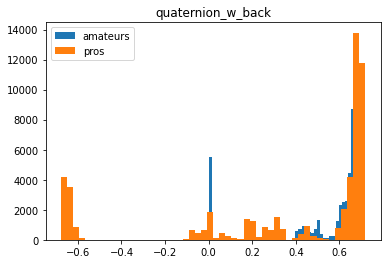

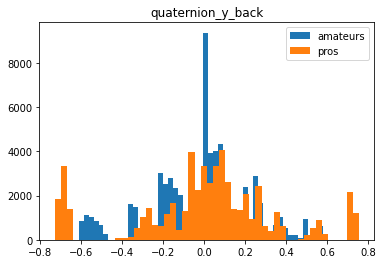

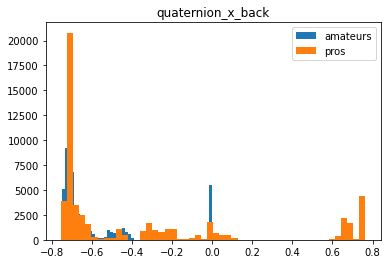

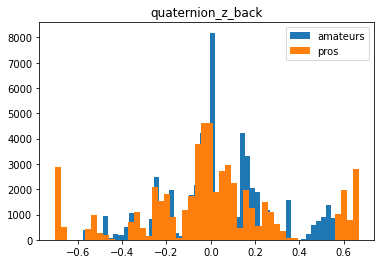

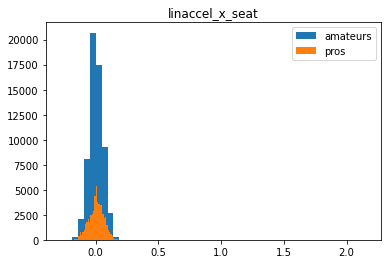

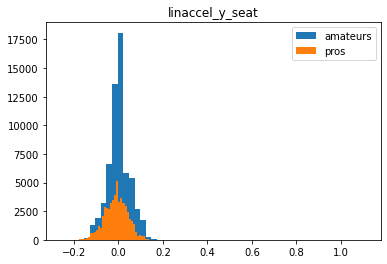

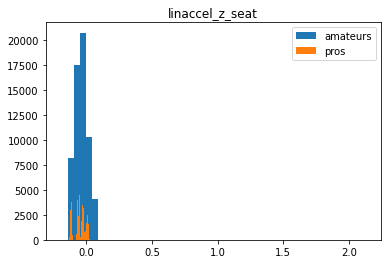

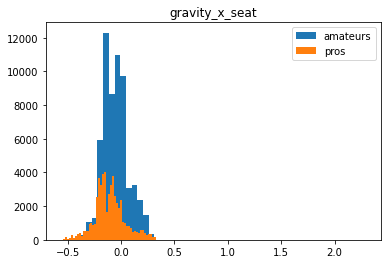

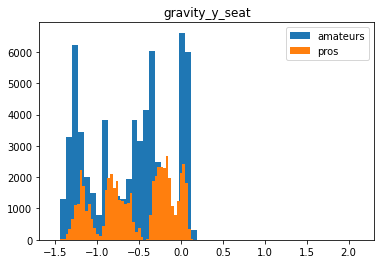

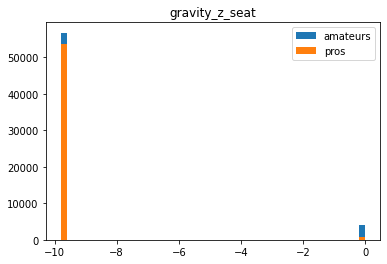

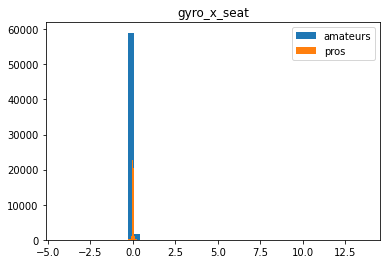

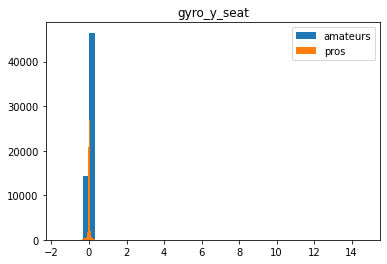

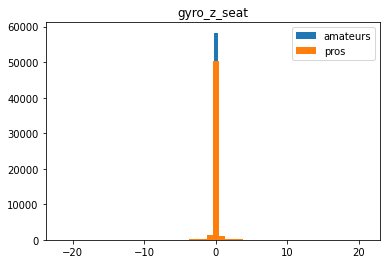

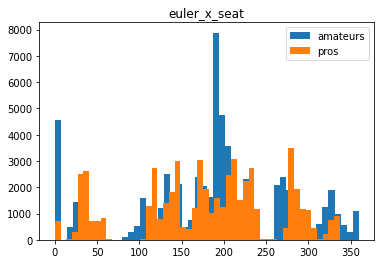

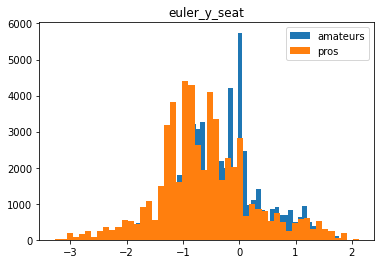

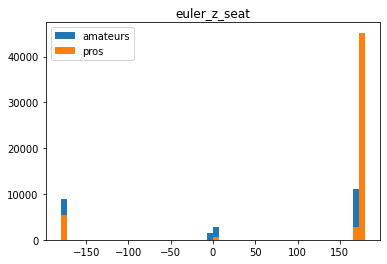

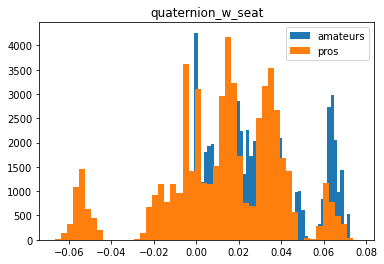

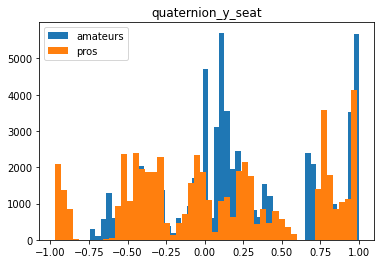

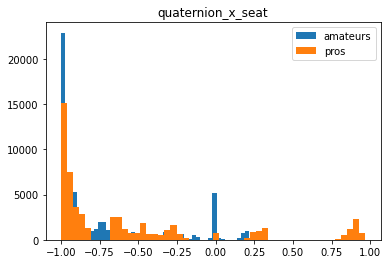

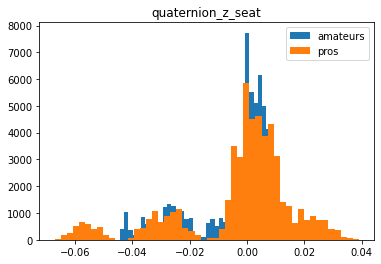

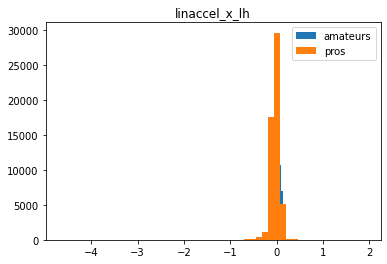

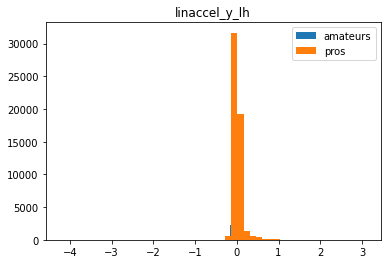

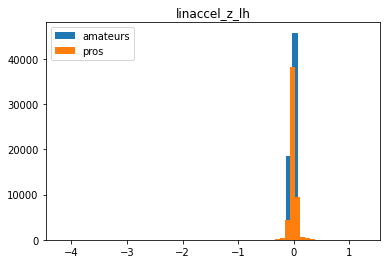

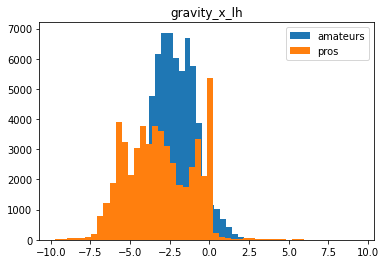

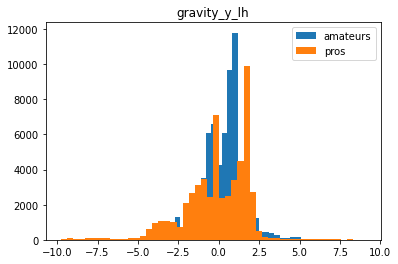

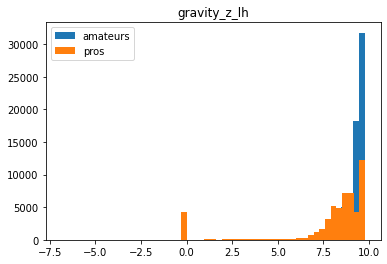

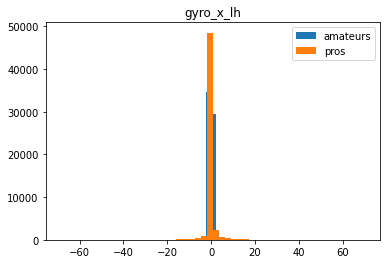

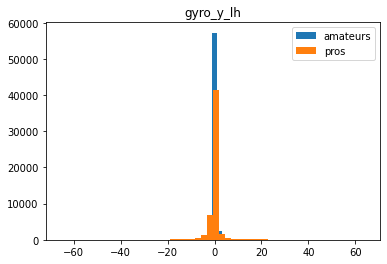

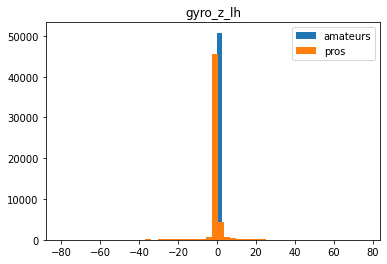

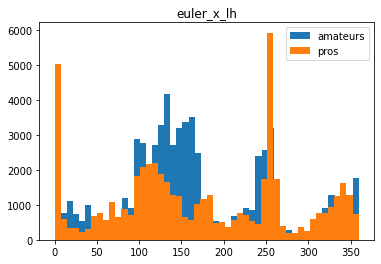

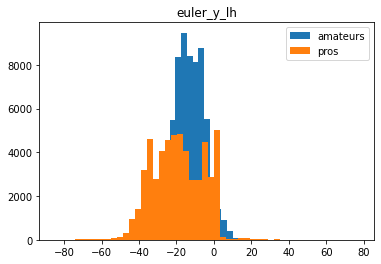

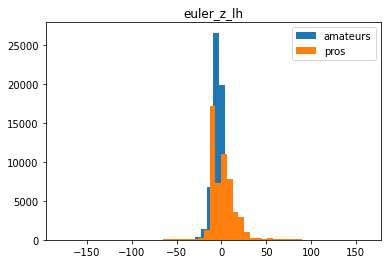

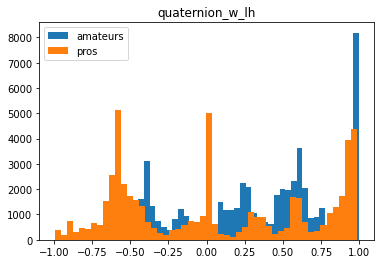

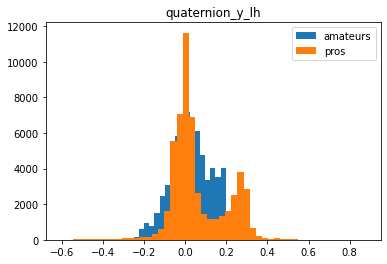

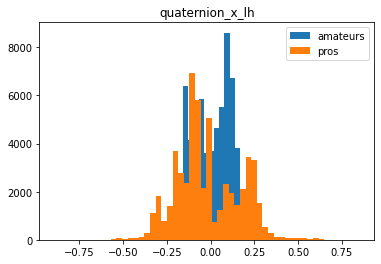

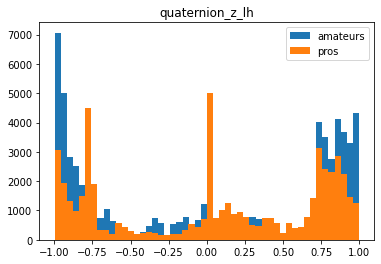

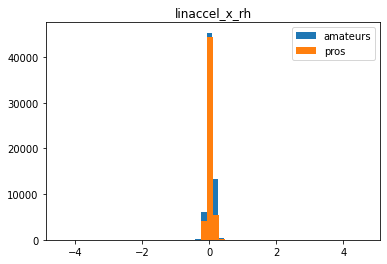

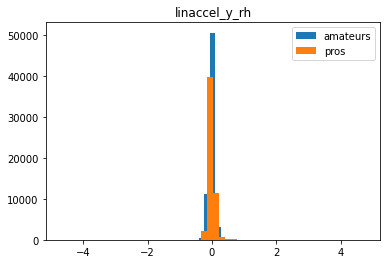

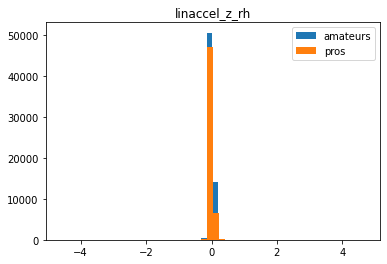

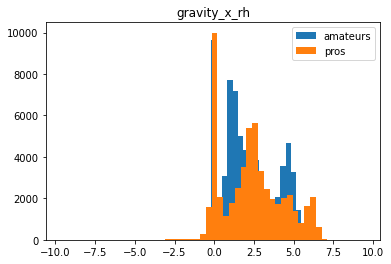

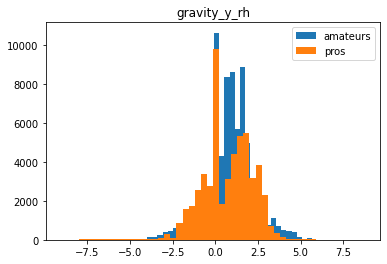

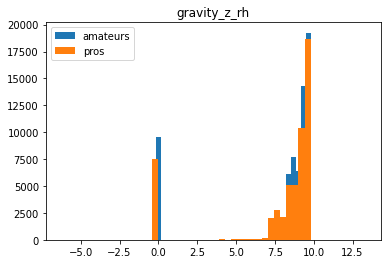

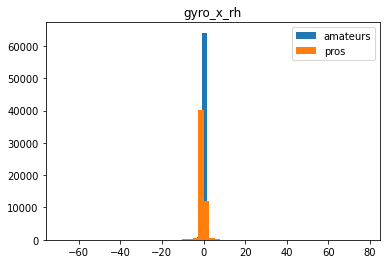

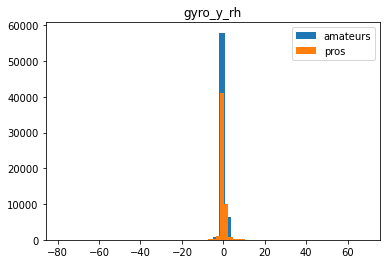

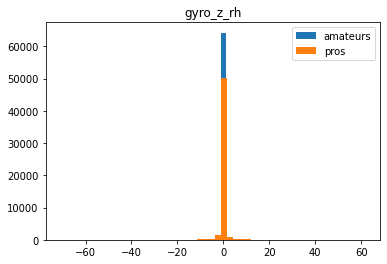

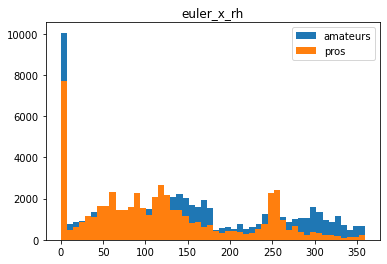

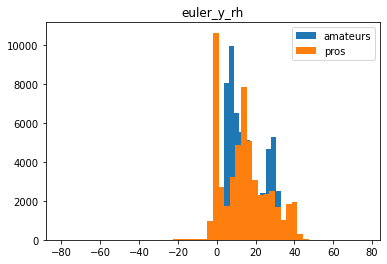

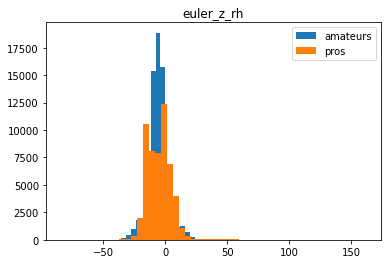

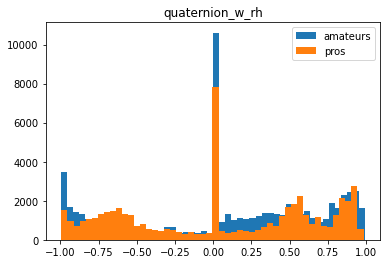

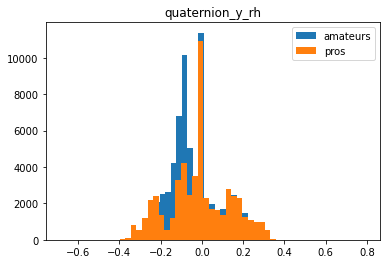

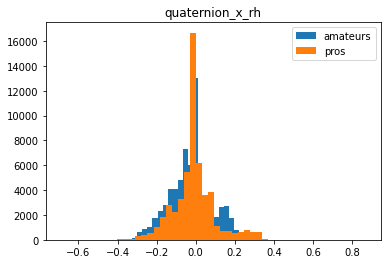

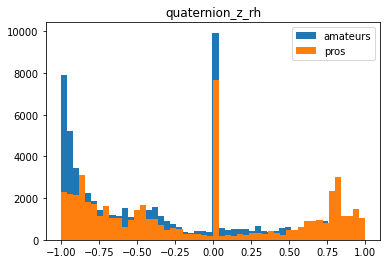

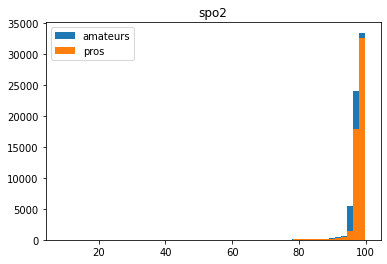

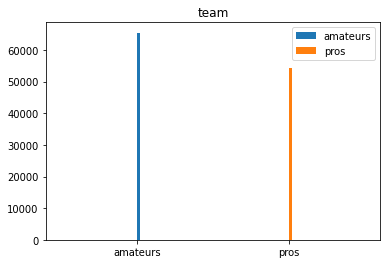

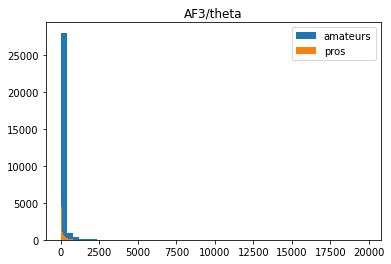

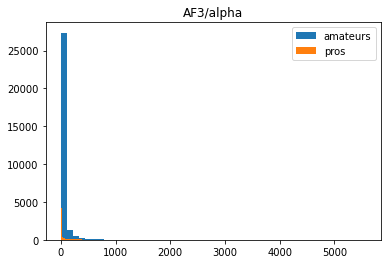

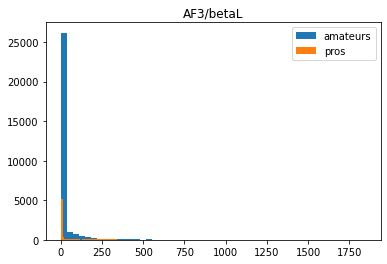

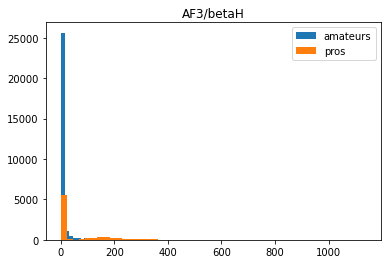

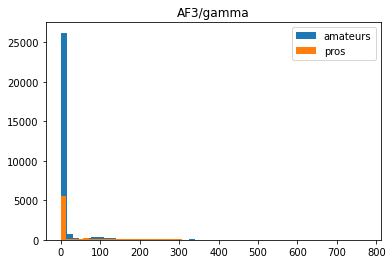

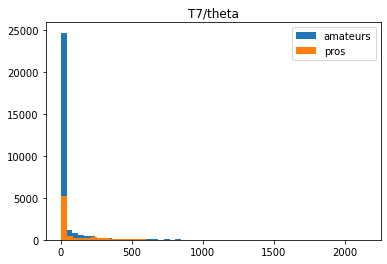

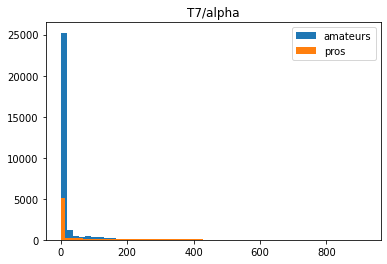

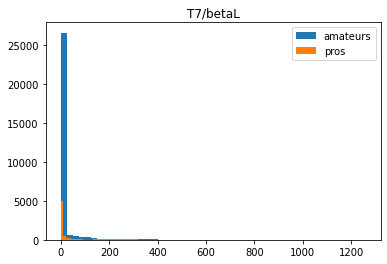

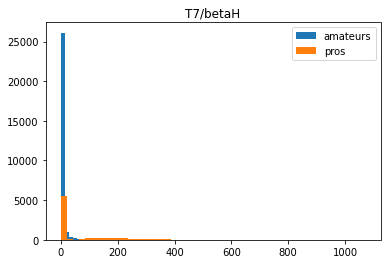

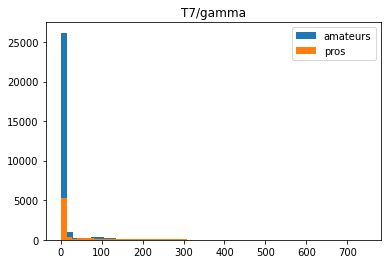

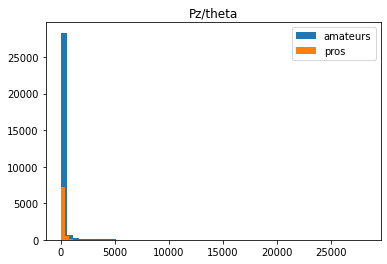

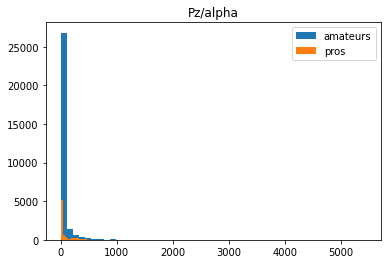

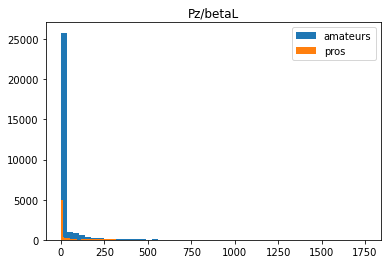

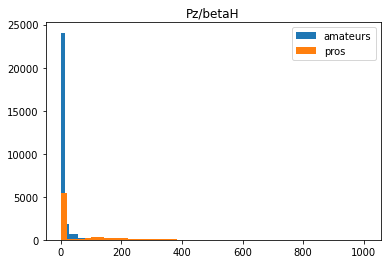

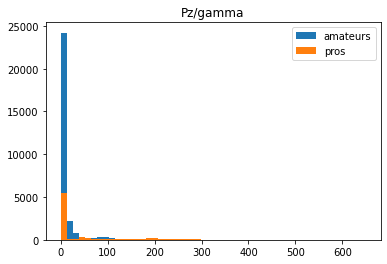

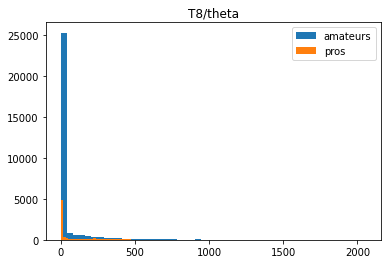

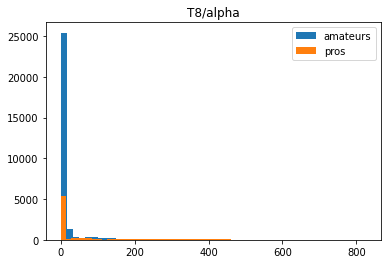

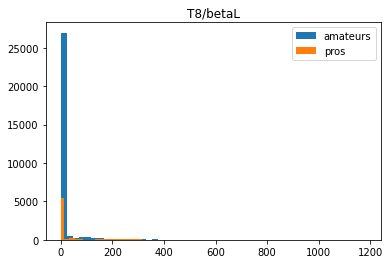

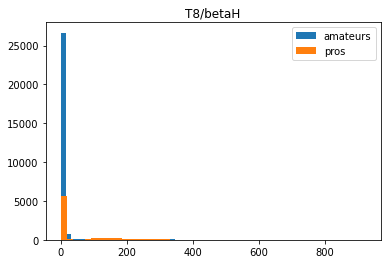

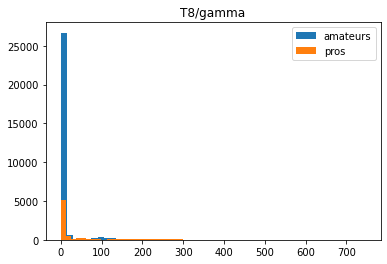

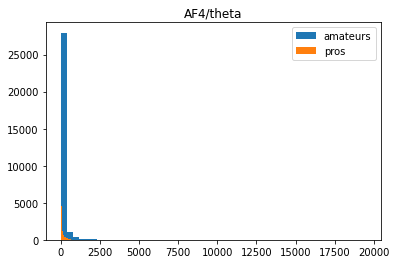

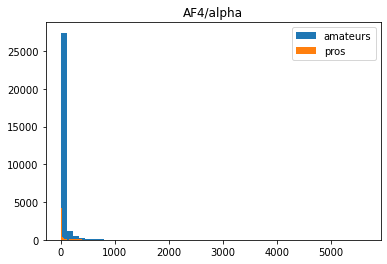

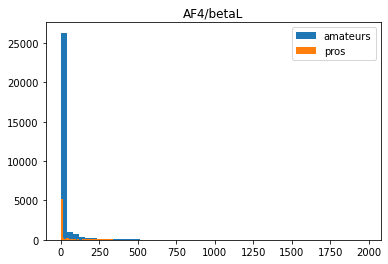

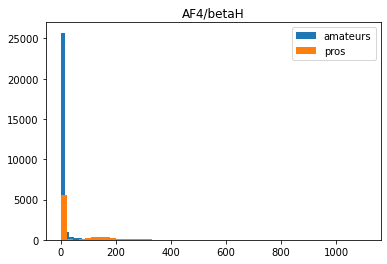

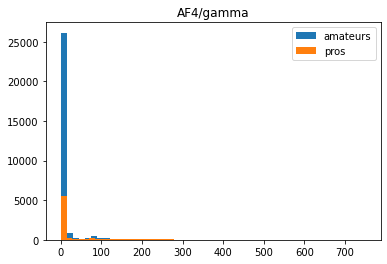

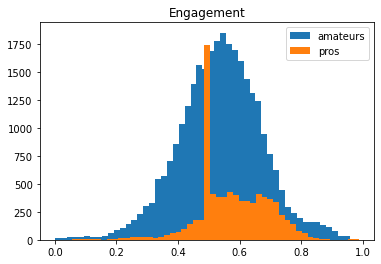

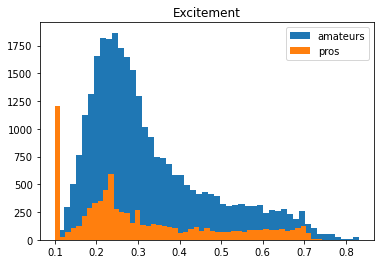

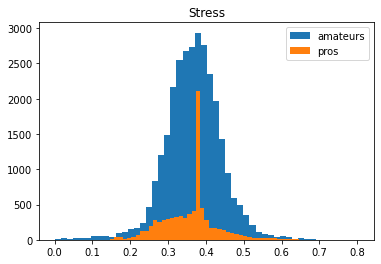

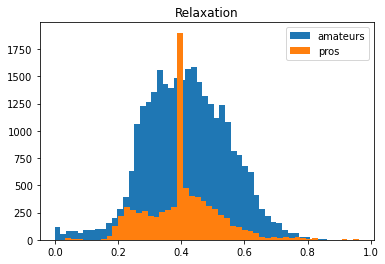

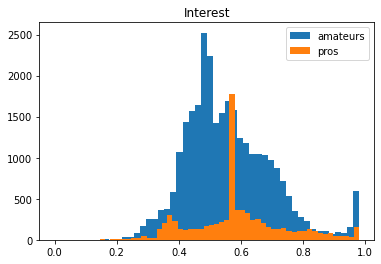

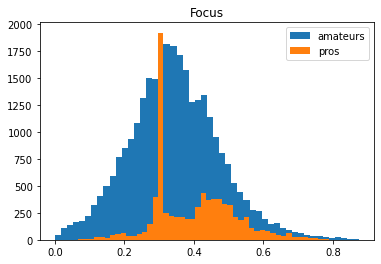

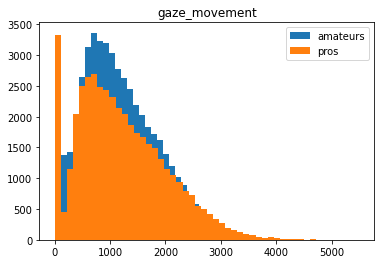

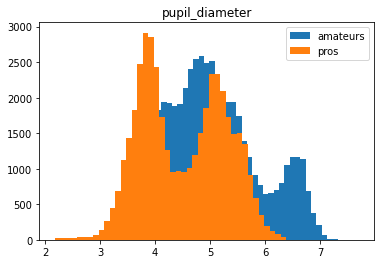

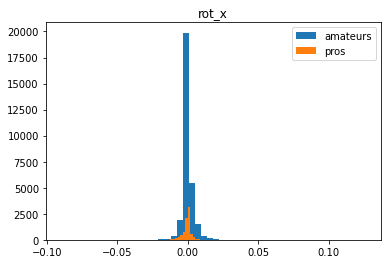

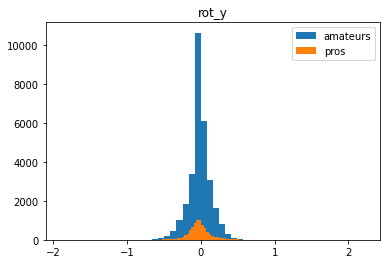

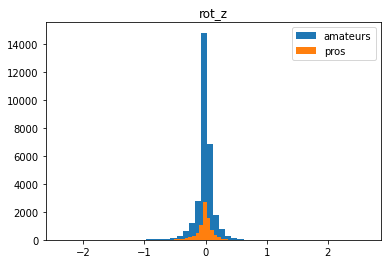

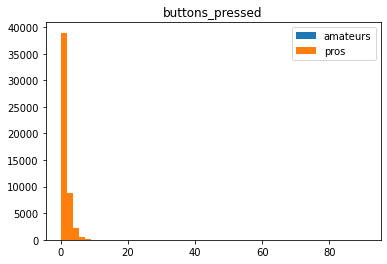

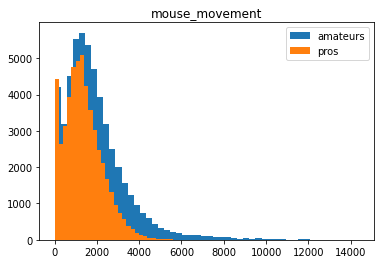

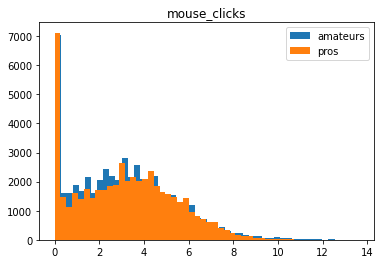

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
# _ = train.hist(bins=50, figsize=(30,20))
bins = 50

x = train.loc[train['team'] == 'amateurs']
y = train.loc[train['team'] == 'pros']

for column in train:
    plt.hist(x[column], bins, label='amateurs')
    plt.hist(y[column], bins, label='pros')
    plt.title(column)
    plt.legend()
    plt.show()

In [11]:
display(x.describe())
display(y.describe())

,Unnamed: 0,time,emg_right_hand,emg_left_hand,facial_skin_temperature,gsr,heart_rate,linaccel_x_back,linaccel_y_back,linaccel_z_back,...,Interest,Focus,gaze_movement,pupil_diameter,rot_x,rot_y,rot_z,buttons_pressed,mouse_movement,mouse_clicks
count,65471.000000,65471.000000,65435.000000,65435.000000,40587.000000,65435.000000,57434.000000,60821.000000,60821.000000,60821.000000,...,29706.000000,29706.000000,51313.000000,51313.000000,29890.000000,29890.000000,29890.000000,52532.000000,52500.000000,52500.000000
mean,78747.989644,836.057338,9.576332,9.445345,35.469643,37001.785777,80.897186,-0.002155,-0.133624,-0.007622,...,0.559663,0.344487,1175.816952,5.074585,0.000056,-0.009272,-0.006221,0.496318,1899.514379,3.095880
std,50664.931871,580.322245,10.525228,12.335289,4.543865,18573.921267,27.017166,0.017867,0.107408,0.060848,...,0.140059,0.129556,735.223978,0.830274,0.004071,0.152194,0.147221,0.972677,1482.210009,2.255615
min,0.000000,0.000000,2.961920,1.812097,28.153200,14633.594476,0.000000,-0.240494,-0.319634,-0.269401,...,0.000000,0.000000,0.000000,2.850583,-0.089896,-1.893375,-2.364397,0.000000,0.000000,0.000000
25%,20531.500000,368.000000,6.746073,5.998053,33.848984,21372.603206,71.000000,-0.011354,-0.249063,-0.048351,...,0.465041,0.260518,633.949035,4.438669,-0.001016,-0.075105,-0.036099,0.000000,929.442168,1.250000
50%,81838.000000,740.000000,8.060092,7.627754,34.575849,31996.056548,83.709677,-0.001534,-0.112369,-0.002799,...,0.539092,0.338906,1067.624787,4.964564,0.000000,0.000000,0.000000,0.062500,1601.961397,2.937500
75%,129332.500000,1207.000000,10.066589,9.933749,35.521729,47243.809958,95.161290,0.006895,-0.046537,0.031779,...,0.645199,0.425649,1643.664809,5.580230,0.000762,0.060057,0.041827,0.625000,2494.097881,4.562500
max,149752.000000,2400.000000,688.404217,678.340986,52.984185,95038.667739,163.000000,0.134562,0.102619,0.220701,...,0.979942,0.875444,5429.199992,7.712070,0.125962,2.225857,2.612111,18.562500,14385.465695,13.625000


,Unnamed: 0,time,emg_right_hand,emg_left_hand,facial_skin_temperature,gsr,heart_rate,linaccel_x_back,linaccel_y_back,linaccel_z_back,...,Interest,Focus,gaze_movement,pupil_diameter,rot_x,rot_y,rot_z,buttons_pressed,mouse_movement,mouse_clicks
count,54331.000000,54331.000000,54285.000000,54285.000000,37002.000000,54285.000000,45046.000000,54285.000000,54285.000000,54285.000000,...,7991.000000,7991.000000,43444.000000,43444.000000,8056.000000,8056.000000,8056.000000,50949.000000,50906.000000,50906.000000
mean,70416.342309,676.381035,15.743605,10.707199,37.787280,31913.207742,84.609937,-0.004410,-0.073527,0.000398,...,0.589903,0.398741,1208.263662,4.510822,-0.000520,-0.022446,-0.010005,1.206220,1370.871040,3.162016
std,31441.378270,450.617807,52.005134,26.241143,7.099645,22230.798184,14.292210,0.022991,0.117285,0.057264,...,0.152815,0.116006,798.378332,0.767360,0.003766,0.162552,0.149487,1.601943,898.509379,2.203162
min,25784.000000,0.000000,2.713172,1.400666,28.148613,14628.571429,50.129032,-0.304273,-0.727175,-0.383947,...,0.145818,0.066235,0.000000,2.172667,-0.043889,-0.966748,-0.811083,0.000000,0.000000,0.000000
25%,42815.500000,309.000000,6.947507,4.929527,34.689146,18547.942305,72.806452,-0.015472,-0.188606,-0.036753,...,0.509451,0.302940,606.045751,3.853183,-0.001323,-0.103073,-0.056832,0.125000,732.929462,1.312500
50%,59818.000000,617.000000,8.663978,6.227521,35.445742,26610.567260,85.354839,-0.002721,-0.072572,0.000000,...,0.569001,0.390072,1083.588390,4.472806,0.000000,-0.026901,-0.005098,0.812500,1260.183320,3.125000
75%,103368.500000,961.000000,12.082376,8.754524,35.999871,33313.478208,95.741935,0.006800,0.040532,0.038455,...,0.662928,0.478797,1725.110729,5.163829,0.000566,0.052337,0.045252,1.750000,1890.584872,4.750000
max,120372.000000,1975.000000,2060.569355,955.889038,53.670000,114863.703557,129.387097,0.477350,0.134248,0.231511,...,0.979942,0.834879,5494.113329,7.188321,0.043817,0.717832,2.144786,90.687500,9985.173112,13.062500


In [12]:
display(x.corr())
display(y.corr())

,Unnamed: 0,time,emg_right_hand,emg_left_hand,facial_skin_temperature,gsr,heart_rate,linaccel_x_back,linaccel_y_back,linaccel_z_back,...,Interest,Focus,gaze_movement,pupil_diameter,rot_x,rot_y,rot_z,buttons_pressed,mouse_movement,mouse_clicks
Unnamed: 0,1.000000,0.101334,-0.069197,0.086868,-0.026303,-0.415327,0.004596,0.043883,-0.076875,0.028171,...,0.128146,-0.018499,-0.072337,0.084676,-0.100444,-0.007790,0.074709,-0.022934,-0.183770,0.070509
time,0.101334,1.000000,0.044679,0.021826,0.019619,-0.027888,0.078700,0.024420,0.097288,-0.025596,...,0.026901,-0.122738,0.064678,0.124226,0.094388,-0.021995,0.016368,0.103744,0.038153,-0.056604
emg_right_hand,-0.069197,0.044679,1.000000,0.163079,0.076485,0.007206,-0.034433,-0.035002,-0.037774,-0.022751,...,0.045299,-0.008139,-0.008144,-0.058359,0.050794,-0.005355,-0.012771,0.026563,-0.024697,-0.089480
emg_left_hand,0.086868,0.021826,0.163079,1.000000,-0.058911,-0.026195,-0.199288,-0.042534,-0.102183,-0.052838,...,0.041455,-0.010085,-0.052091,-0.059087,0.065547,0.011769,-0.018821,-0.012902,-0.008676,0.080169
facial_skin_temperature,-0.026303,0.019619,0.076485,-0.058911,1.000000,-0.190553,-0.419135,0.081865,-0.378239,-0.068306,...,0.233029,0.035390,-0.393564,-0.138032,-0.071628,-0.070945,0.032694,-0.103397,0.128441,-0.021767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rot_y,-0.007790,-0.021995,-0.005355,0.011769,-0.070945,0.059518,-0.013797,-0.007131,0.009819,0.001136,...,-0.034566,-0.006692,0.048744,-0.035182,0.029399,1.000000,0.000122,0.005034,-0.010159,-0.001917
rot_z,0.074709,0.016368,-0.012771,-0.018821,0.032694,0.089548,-0.024103,-0.015403,0.076462,-0.006353,...,0.054815,0.013349,-0.014955,-0.076763,-0.005761,0.000122,1.000000,-0.019952,0.013842,0.005438
buttons_pressed,-0.022934,0.103744,0.026563,-0.012902,-0.103397,-0.003099,0.093762,0.008722,0.098967,-0.012300,...,-0.103920,-0.019036,-0.074371,0.175910,-0.013761,0.005034,-0.019952,1.000000,-0.075612,0.133663
mouse_movement,-0.183770,0.038153,-0.024697,-0.008676,0.128441,-0.005868,-0.056101,0.060409,-0.180542,-0.097897,...,-0.028158,-0.031033,-0.042984,0.059121,-0.025017,-0.010159,0.013842,-0.075612,1.000000,0.111126


,Unnamed: 0,time,emg_right_hand,emg_left_hand,facial_skin_temperature,gsr,heart_rate,linaccel_x_back,linaccel_y_back,linaccel_z_back,...,Interest,Focus,gaze_movement,pupil_diameter,rot_x,rot_y,rot_z,buttons_pressed,mouse_movement,mouse_clicks
Unnamed: 0,1.000000,0.129111,0.014180,-0.063100,0.089383,-0.144501,-0.270741,0.031603,0.147068,0.036057,...,-0.265475,-0.407610,-0.228822,-0.164368,-0.205034,0.017914,0.051844,-0.030198,-0.039656,-0.035802
time,0.129111,1.000000,0.001110,0.017325,0.081122,-0.024408,0.022467,0.031517,0.012002,-0.011498,...,-0.125940,-0.165851,0.024115,-0.064476,-0.167626,0.047573,-0.027949,-0.033710,-0.045465,-0.126435
emg_right_hand,0.014180,0.001110,1.000000,0.059332,0.011949,0.026322,-0.018394,0.006386,-0.089870,0.002868,...,0.048304,-0.111180,-0.052066,-0.007889,0.015949,0.013146,-0.033023,-0.050596,-0.060427,-0.108644
emg_left_hand,-0.063100,0.017325,0.059332,1.000000,0.038731,0.383555,0.023697,0.018314,-0.063581,-0.028457,...,0.191749,0.111948,0.067965,-0.052558,0.186844,-0.100434,-0.089352,-0.044233,-0.029967,-0.066907
facial_skin_temperature,0.089383,0.081122,0.011949,0.038731,1.000000,-0.056475,-0.615464,-0.003162,-0.671785,-0.125334,...,0.215691,0.045612,-0.066585,-0.664979,0.102141,-0.257778,-0.162677,-0.028576,0.148609,0.024553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rot_y,0.017914,0.047573,0.013146,-0.100434,-0.257778,0.197538,0.204419,-0.048977,0.285165,0.113986,...,-0.140803,0.108572,0.085659,0.083117,0.116869,1.000000,-0.031383,-0.006938,-0.085450,0.036690
rot_z,0.051844,-0.027949,-0.033023,-0.089352,-0.162677,0.012515,0.143830,0.027321,0.165526,0.057139,...,0.113090,-0.125055,0.052081,0.006454,0.125750,-0.031383,1.000000,0.034246,-0.068688,0.032545
buttons_pressed,-0.030198,-0.033710,-0.050596,-0.044233,-0.028576,-0.023484,-0.066600,0.020656,-0.051637,-0.071462,...,-0.012229,0.006478,-0.170001,0.110958,0.024323,-0.006938,0.034246,1.000000,0.032228,0.117979
mouse_movement,-0.039656,-0.045465,-0.060427,-0.029967,0.148609,0.062424,-0.150339,0.015571,-0.158314,-0.049239,...,-0.070276,0.043087,0.095656,-0.018303,-0.030885,-0.085450,-0.068688,0.032228,1.000000,0.202230


<AxesSubplot:>

<AxesSubplot:>

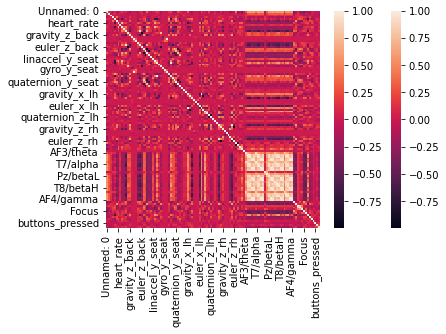

In [13]:
import seaborn as sns

_ = sns.heatmap(x.corr())
display(_)
_ = sns.heatmap(y.corr())
display(_)

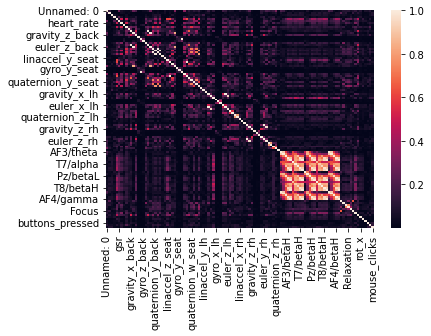

In [14]:
_ = sns.heatmap(train.corr().abs())

In [15]:
#from pandas.plotting import scatter_matrix

#_ = scatter_matrix(train, figsize=(20, 20))

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000020F306C2B80> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000020F302BF0D0> (for post_execute):


KeyboardInterrupt: 

In [17]:
#attributes = ["amateurs", "pros"]
#_ = sns.pairplot(train[attributes])

In [18]:
train.isna().sum()

Unnamed: 0                     0
time                           0
emg_right_hand                82
emg_left_hand                 82
facial_skin_temperature    42213
                           ...  
rot_y                      81856
rot_z                      81856
buttons_pressed            16321
mouse_movement             16396
mouse_clicks               16396
Length: 112, dtype: int64

In [19]:
train.isna().sum()/train.count()*100

Unnamed: 0                   0.000000
time                         0.000000
emg_right_hand               0.068493
emg_left_hand                0.068493
facial_skin_temperature     54.405908
                              ...    
rot_y                      215.717072
rot_z                      215.717072
buttons_pressed             15.771977
mouse_movement              15.855946
mouse_clicks                15.855946
Length: 112, dtype: float64

## Prepare the Data
Notes:
* Work on copies of the data (keep the original dataset intact).
* Write functions for all data transformations you apply, for five reasons:
  * So you can easily prepare the data the next time you get a fresh dataset
  * So you can apply these transformations in future projects
  * To clean and prepare the test set
  * To clean and prepare new data instances once your solution is live
  * To make it easy to treat your preparation choices as hyperparameters

1. Data cleaning:
   1. Fix or remove outliers (optional).
   2. Fill in missing values (e.g., with zero, mean, median…) or drop their rows (or columns).
3. Feature selection (optional): Drop the attributes that provide no useful information for the task.
4. Feature engineering, where appropriate:
  1. Discretize continuous features.
  2. Decompose features (e.g., categorical, date/time, etc.).
  3. Add promising transformations of features (e.g., log(x), sqrt(x), x2, etc.).
  4. Aggregate features into promising new features.
5. Feature scaling: standardize or normalize features.

### Separate X from y

In [20]:
train_X = train.drop(columns=['team'])
train_y = train['team']
train_y =  pd.DataFrame(train_y)
d = {'amateurs': 0.0, 'pros': 1.0}
train_y = train_y['team'].map(d)
train_y =  pd.DataFrame(train_y)


In [21]:
train_X.head()

,Unnamed: 0,time,emg_right_hand,emg_left_hand,facial_skin_temperature,gsr,heart_rate,linaccel_x_back,linaccel_y_back,linaccel_z_back,...,Interest,Focus,gaze_movement,pupil_diameter,rot_x,rot_y,rot_z,buttons_pressed,mouse_movement,mouse_clicks
27751,27751,246.0,9.997551,4.652622,35.857161,17461.523088,88.161290,-0.000245,-0.095905,0.028949,...,NaN,NaN,576.547904,5.679606,NaN,NaN,NaN,1.875,1259.153952,1.2500
135826,135826,316.0,8.535986,3.803005,33.433803,43808.552844,91.451613,0.014234,-0.109551,0.037593,...,NaN,NaN,1280.257451,4.050004,NaN,NaN,NaN,5.125,2312.674632,0.0625
55808,55808,90.0,13.282597,4.854766,35.272426,36127.643578,97.935484,-0.038601,0.070128,-0.013292,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.875,1314.387166,4.3125
124315,124315,1599.0,14.390323,6.957258,35.891104,47232.871334,78.709677,-0.007287,-0.276044,-0.070219,...,0.649783,0.530331,NaN,NaN,-0.003658,0.194432,0.017677,0.000,2085.453071,2.1875
87743,87743,925.0,10.175730,4.488479,33.865968,36087.605685,85.516129,-0.038879,-0.115518,-0.061801,...,0.494993,0.261197,780.613273,5.393371,-0.002426,-0.181194,0.043682,6.875,402.826613,2.1250


In [22]:
train_y.head()

,team
27751,1.0
135826,0.0
55808,1.0
124315,0.0
87743,0.0


### Check for missing values 

In [23]:
train_X[train_X.isna().any(axis=1)]

,Unnamed: 0,time,emg_right_hand,emg_left_hand,facial_skin_temperature,gsr,heart_rate,linaccel_x_back,linaccel_y_back,linaccel_z_back,...,Interest,Focus,gaze_movement,pupil_diameter,rot_x,rot_y,rot_z,buttons_pressed,mouse_movement,mouse_clicks
27751,27751,246.0,9.997551,4.652622,35.857161,17461.523088,88.161290,-0.000245,-0.095905,0.028949,...,NaN,NaN,576.547904,5.679606,NaN,NaN,NaN,1.8750,1259.153952,1.2500
135826,135826,316.0,8.535986,3.803005,33.433803,43808.552844,91.451613,0.014234,-0.109551,0.037593,...,NaN,NaN,1280.257451,4.050004,NaN,NaN,NaN,5.1250,2312.674632,0.0625
55808,55808,90.0,13.282597,4.854766,35.272426,36127.643578,97.935484,-0.038601,0.070128,-0.013292,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8750,1314.387166,4.3125
124315,124315,1599.0,14.390323,6.957258,35.891104,47232.871334,78.709677,-0.007287,-0.276044,-0.070219,...,0.649783,0.530331,NaN,NaN,-0.003658,0.194432,0.017677,0.0000,2085.453071,2.1875
31971,31971,876.0,7.133038,8.841485,34.585406,53059.814254,94.903226,-0.028208,0.008630,-0.038702,...,NaN,NaN,532.022114,5.742900,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5307,5307,517.0,7.636677,8.696729,34.209935,68916.944225,95.032258,-0.010000,-0.010000,-0.010000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57651,57651,913.0,8.147128,3.724495,36.574000,16386.180521,72.516129,0.017129,-0.189027,-0.039760,...,NaN,NaN,1414.751684,4.855209,NaN,NaN,NaN,0.4375,659.774885,6.0625
129082,129082,1506.0,6.684697,6.747954,32.672172,40754.281049,104.225806,0.013291,-0.112149,-0.100640,...,NaN,NaN,2333.744144,3.975520,NaN,NaN,NaN,0.0000,1768.204573,2.8125
125205,125205,88.0,8.365822,8.236098,33.518590,19125.281616,139.451613,-0.037240,-0.152924,0.000468,...,0.679259,0.846616,988.025762,5.146153,0.001750,-0.034231,0.033965,NaN,NaN,NaN


### Removing rows

In [24]:
tmp = train_X.dropna()

tmp.isna().sum()

Unnamed: 0                 0
time                       0
emg_right_hand             0
emg_left_hand              0
facial_skin_temperature    0
                          ..
rot_y                      0
rot_z                      0
buttons_pressed            0
mouse_movement             0
mouse_clicks               0
Length: 111, dtype: int64

In [25]:
train_X.count() - tmp.count()

Unnamed: 0                 104041
time                       104041
emg_right_hand             103959
emg_left_hand              103959
facial_skin_temperature     61828
                            ...  
rot_y                       22185
rot_z                       22185
buttons_pressed             87720
mouse_movement              87645
mouse_clicks                87645
Length: 111, dtype: int64

### Removing columns

In [26]:
tmp = train_X.dropna(axis=1)

tmp.isna().sum()

Unnamed: 0    0
time          0
dtype: int64

In [27]:
train_X.count() - tmp.count()

AF3/alpha    NaN
AF3/betaH    NaN
AF3/betaL    NaN
AF3/gamma    NaN
AF3/theta    NaN
            ... 
rot_x        NaN
rot_y        NaN
rot_z        NaN
spo2         NaN
time         0.0
Length: 111, dtype: float64

### Filling missing values

In [28]:
train_num = train_X.drop('heart_rate', axis=1)

train_num.isna().sum()

Unnamed: 0                     0
time                           0
emg_right_hand                82
emg_left_hand                 82
facial_skin_temperature    42213
                           ...  
rot_y                      81856
rot_z                      81856
buttons_pressed            16321
mouse_movement             16396
mouse_clicks               16396
Length: 110, dtype: int64

In [29]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(train_num)

SimpleImputer(strategy='median')

In [30]:
tmp = imputer.transform(train_num)
tmp = pd.DataFrame(tmp, columns=train_num.columns, index=train_num.index)

tmp.isna().sum()

Unnamed: 0                 0
time                       0
emg_right_hand             0
emg_left_hand              0
facial_skin_temperature    0
                          ..
rot_y                      0
rot_z                      0
buttons_pressed            0
mouse_movement             0
mouse_clicks               0
Length: 110, dtype: int64

In [31]:
train_X.count() - tmp.count()

AF3/alpha   -81858.0
AF3/betaH   -81858.0
AF3/betaL   -81858.0
AF3/gamma   -81858.0
AF3/theta   -81858.0
              ...   
rot_x       -81856.0
rot_y       -81856.0
rot_z       -81856.0
spo2          -856.0
time             0.0
Length: 111, dtype: float64

### One-hot encoding

In [32]:
from sklearn.preprocessing import OneHotEncoder
#train_ydf =  pd.DataFrame(train_y)
cat_encoder = OneHotEncoder()
cat_encoder.fit(train_y[['team']])

OneHotEncoder()

In [33]:
cat_encoder.transform(train_y[['team']])

<119802x2 sparse matrix of type '<class 'numpy.float64'>'
	with 119802 stored elements in Compressed Sparse Row format>

### Adding new attributes

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

# column index
heart_rate_ix, facial_skin_temperature_ix = 6,4 #,focus_ix,interest_ix = 6, 4,103,104

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):    
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        heart_rate_per_facial_skin = X[:, heart_rate_ix] / X[:, facial_skin_temperature_ix]
       # focus_per_interest = X[:, focus_ix] / X[:, interest_ix]        
        return np.c_[X, heart_rate_per_facial_skin]

attr_adder = CombinedAttributesAdder()
attr_adder.transform(train_X.values)

array([[2.77510000e+04, 2.46000000e+02, 9.99755078e+00, ...,
        1.25915395e+03, 1.25000000e+00, 2.45868014e+00],
       [1.35826000e+05, 3.16000000e+02, 8.53598591e+00, ...,
        2.31267463e+03, 6.25000000e-02, 2.73530392e+00],
       [5.58080000e+04, 9.00000000e+01, 1.32825971e+01, ...,
        1.31438717e+03, 4.31250000e+00, 2.77654518e+00],
       ...,
       [1.25205000e+05, 8.80000000e+01, 8.36582181e+00, ...,
                   nan,            nan, 4.16042595e+00],
       [4.07530000e+04, 3.35000000e+02, 7.04703833e+00, ...,
                   nan,            nan, 2.70603053e+00],
       [1.41480000e+04, 6.21000000e+02, 7.05224089e+00, ...,
        9.60654045e+02, 7.06250000e+00, 2.14768899e+00]])

### Full pipeline

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_attribs = train_num.columns
cat_attribs = ["heart_rate"]

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

full_pipeline.fit(train)
train_prepared = full_pipeline.transform(train)
train_prepared.shape

(119802, 111)

In [36]:
columns = list(train_num.columns) + ['heart_rate_per_facial_skin'] # list(full_pipeline.transformers_[1][1].categories_[0])

train_prepared_df = pd.DataFrame(train_prepared, columns=columns)
train_prepared_df.head()

,Unnamed: 0,time,emg_right_hand,emg_left_hand,facial_skin_temperature,gsr,linaccel_x_back,linaccel_y_back,linaccel_z_back,gravity_x_back,...,Focus,gaze_movement,pupil_diameter,rot_x,rot_y,rot_z,buttons_pressed,mouse_movement,mouse_clicks,heart_rate_per_facial_skin
0,-1.092417,-0.974007,-0.065916,-0.269656,-0.036670,-0.841881,0.146015,0.077293,0.561276,-0.344870,...,-0.048373,-0.864856,1.141919,0.009339,0.043859,0.026742,0.858168,-0.297526,-0.902195,0.146305
1,1.407935,-0.842294,-0.106525,-0.312377,-0.531722,0.445563,0.867385,-0.042569,0.709922,1.139786,...,-0.048373,0.166994,-1.014279,0.009339,0.043859,0.026742,3.389476,0.601787,-1.475293,0.901851
2,-0.443309,-1.267540,0.025356,-0.259492,-0.156122,0.070236,-1.765057,1.535598,-0.165128,0.346583,...,-0.048373,-0.134941,0.002299,0.009339,0.043859,0.026742,0.079304,-0.250377,0.575794,-1.753341
3,1.141624,1.571824,0.056134,-0.153774,-0.029736,0.612892,-0.204854,-1.504912,-1.144086,0.299774,...,2.513641,-0.134941,0.002299,-1.609340,2.274709,0.239217,-0.602203,0.407825,-0.449750,-0.196408
4,0.295519,0.303612,-0.060966,-0.277910,-0.443438,0.068280,-1.778897,-0.094972,-0.999327,-2.107650,...,-1.204030,-0.565635,0.763189,-1.064295,-2.035106,0.551797,4.752489,-1.028510,-0.479913,-1.847055


In [37]:
train_prepared_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,119802.0,-3.938168e-17,1.000004,-1.734446,-0.865106,0.001063,0.866516,1.730118
time,119802.0,4.050856e-17,1.000004,-1.436886,-0.799017,-0.161148,0.602790,3.079001
emg_right_hand,119802.0,4.934572e-17,1.000004,-0.268307,-0.153981,-0.113351,-0.043725,56.907582
emg_left_hand,119802.0,7.876336e-17,1.000004,-0.433172,-0.232450,-0.149916,-0.025110,47.560712
facial_skin_temperature,119802.0,-2.511175e-16,1.000004,-1.611399,-0.279555,-0.202102,-0.124713,3.602198
...,...,...,...,...,...,...,...,...
rot_z,119802.0,1.334470e-17,1.000004,-28.393414,0.026742,0.026742,0.026742,31.424428
buttons_pressed,119802.0,5.930976e-18,1.000004,-0.602203,-0.602203,-0.358807,0.176662,70.031044
mouse_movement,119802.0,2.952440e-16,1.000004,-1.372373,-0.585358,-0.169961,0.355642,10.907444
mouse_clicks,119802.0,-6.702002e-17,1.000004,-1.505456,-0.751380,-0.027467,0.605957,5.070086


## Short-List Promising Models

Notes:
* If the data is huge, you may want to sample smaller training sets so you can train many different models in a reasonable time (be aware that this penalizes complex models such as large neural nets or Random Forests).
* Once again, try to automate these steps as much as possible.

1. Train many quick and dirty models from different categories (e.g., linear, naive Bayes, SVM, Random Forests, neural net, etc.) using standard parameters.
2. Measure and compare their performance.
3. For each model, use N-fold cross-validation and compute the mean and standard deviation of the performance measure on the N folds.
4. Analyze the most significant variables for each algorithm.
5. Analyze the types of errors the models make.
6. What data would a human have used to avoid these errors?
7. Have a quick round of feature selection and engineering.
8. Have one or two more quick iterations of the five previous steps.
9. Short-list the top three to five most promising models, preferring models that make different types of errors.

### Linear regression

In [38]:

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
#train_y2 = pd.DataFrame(train_y, columns=columns2)
#train_y2.head()
lin_reg.fit(train_prepared, train_y)

LinearRegression()

In [39]:
some_data = train_X.iloc[:5]
some_labels = train_y.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [[ 0.92363892]
 [ 0.12815418]
 [ 0.63057302]
 [-0.23527227]
 [ 0.16981239]]
Labels: ['team']


In [40]:
from sklearn.metrics import mean_squared_error

pred = lin_reg.predict(train_prepared)
lin_mse = mean_squared_error(train_y, pred)
lin_mse, np.sqrt(lin_mse)

(0.050437351195705395, 0.22458261552423286)

### Other model (for comparison purposes)

In [41]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_prepared, train_y)

DecisionTreeRegressor(random_state=42)

In [42]:
pred = tree_reg.predict(train_prepared)
tree_mse = mean_squared_error(train_y, pred)
tree_mse, np.sqrt(tree_mse)

(0.0, 0.0)

### Comparison with cross-validation

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

lin_reg_scores = cross_val_score(lin_reg, train_prepared, train_y, scoring=make_scorer(mean_squared_error), cv=10)

pd.Series(np.sqrt(lin_reg_scores)).describe()

count    10.000000
mean      0.225078
std       0.001598
min       0.222423
25%       0.223852
50%       0.225384
75%       0.226323
max       0.227098
dtype: float64

In [44]:
tree_reg_scores = cross_val_score(tree_reg, train_prepared, train_y, scoring=make_scorer(mean_squared_error), cv=10)

pd.Series(np.sqrt(tree_reg_scores)).describe()

count    10.000000
mean      0.022528
std       0.013687
min       0.000000
25%       0.010082
50%       0.026532
75%       0.034114
max       0.037670
dtype: float64

### Significance

In [45]:
list(zip(train_prepared_df.columns, lin_reg.coef_))

[('Unnamed: 0',
  array([ 7.89935565e-03, -5.88880380e-03,  4.48610467e-03, -1.18888790e-02,
          1.15558527e-01, -9.41367993e-03, -1.15867731e-02,  1.61208213e-01,
          1.22767088e-02, -2.45416597e-01,  4.90951015e+00,  5.49943259e-01,
          1.88271851e-03, -2.34820779e-03,  5.87949628e-03,  1.60190466e-02,
         -7.68938141e-02,  5.10759448e+00,  2.14407197e-02, -4.47267837e-01,
          5.52749049e-01, -6.11732288e-01, -7.64756051e-02, -7.82187268e-03,
          5.15441139e-03, -9.38110078e-03, -1.57291106e-01, -4.14747434e-02,
          9.06084576e-04, -4.20418037e-04,  1.20972098e-03, -1.47964162e-01,
         -1.36609286e-01,  2.40452917e-03, -1.47669331e-01,  4.61762493e-01,
         -4.82418011e-01,  3.72073683e-01, -2.40222178e-02,  3.53546826e-02,
         -2.80923552e-03, -1.92056794e-01,  1.34300181e-01, -1.89849396e-01,
          3.30979803e-05, -2.61881452e-03,  1.07056180e-03, -7.81492501e-04,
          1.60860832e-01,  3.70634102e-02, -1.06380535e-01, 

### Error analysis

In [89]:
lin_reg.fit(train_prepared, train_y)
pred = lin_reg.predict(train_prepared)
pred = pred.transpose()
pred = pred[0]
print(pred)
train_with_predictions = pd.concat([train_y.reset_index(), pd.Series(pred)], axis=1).set_index('index').rename(columns={0: 'prediction'})
train_with_predictions.head()
#print("RMS: %r " % np.sqrt(np.mean((predicted - expected) ** 2)))
#ax = plt.gca()
#train_with_predictions.plot(kind='scatter',x='index', y='prediction',ax=ax,use_index=True)
#train_with_predictions.plot(kind='line',x='team',y='prediction', color='red', ax=ax)
#plt.show()

[0.92363892 0.12815418 0.63057302 ... 0.41521197 0.92196159 0.14928067]


,team,prediction
index,,
27751,1.0,0.923639
135826,0.0,0.128154
55808,1.0,0.630573
124315,0.0,-0.235272
87743,0.0,0.169812


In [ ]:
fig = px.scatter_mapbox(train_with_predictions, lat="latitude", lon="longitude", color="prediction",
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=4, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [ ]:
diff = train_with_predictions['median_house_value'] - train_with_predictions['prediction']
fig = px.scatter_mapbox(train_with_predictions, lat="latitude", lon="longitude", color=diff,
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=4, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

## Fine-Tune the System

Notes:
* You will want to use as much data as possible for this step, especially as you move toward the end of fine-tuning.
* As always automate what you can.

1. Fine-tune the hyperparameters using cross-validation.
2. Treat your data transformation choices as hyperparameters, especially when you are not sure about them (e.g., should I replace missing values with zero or with the median value? Or just drop the rows?).
3. Unless there are very few hyperparameter values to explore, prefer random search over grid search. If training is very long, you may prefer a Bayesian optimization approach.
4. Try Ensemble methods. Combining your best models will often perform better than running them individually.
5. Once you are confident about your final model, measure its performance on the test set to estimate the generalization error.

## Present Your Solution

1. Document what you have done.
2. Create a nice presentation.
3. Make sure you highlight the big picture first.
4. Explain why your solution achieves the business objective.
5. Don’t forget to present interesting points you noticed along the way.
6. Describe what worked and what did not.
7. List your assumptions and your system’s limitations.
8. Ensure your key findings are communicated through beautiful visualizations or easy-to-remember statements (e.g., “the median income is the number-one predictor of housing prices”).

## Launch!

1. Get your solution ready for production (plug into production data inputs, write unit tests, etc.).
2. Write monitoring code to check your system’s live performance at regular intervals and trigger alerts when it drops.
3. Beware of slow degradation too: models tend to “rot” as data evolves.
4. Measuring performance may require a human pipeline (e.g., via a crowdsourcing service).
5. Also monitor your inputs’ quality (e.g., a malfunctioning sensor sending random values, or another team’s output becoming stale). This is particularly important for online learning systems.
6. Retrain your models on a regular basis on fresh data (automate as much as possible).